# Outranking algorithms

This notebook is dedicated to the use of Promethee outranking algorithms.

In [1]:
%matplotlib notebook
%config Completer.use_jedi = False

## Outranking problem formalization

In [2]:
from pandas import DataFrame
from mcda.outranking.promethee1 import *
from mcda.outranking.promethee2 import *
from mcda.outranking.prometheeGAIA import *
from mcda.plot.plot import *
from mcda.core.scales import PreferenceDirection

In [3]:
#Parameters 

action_names = ['a1', 'a2', 'a3', 'a4', 'a5']
crit_names = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6']

dataset = DataFrame([
    [1, 2, -1, 5, 2, 2],  # a1
    [3, 5, 3, -5, 3, 3],  # a2
    [3, -5, 3, 4, 3, 2],  # a3
    [2, -2, 2, 5, 1, 1],  # a4
    [3, 5, 3, -5, 3, 3],  # a5
], index=action_names)

scales = {
    0: QuantitativeScale(-5, 5, PreferenceDirection.MAX),
    1: QuantitativeScale(-5, 5, PreferenceDirection.MAX),
    2: QuantitativeScale(-5, 5, PreferenceDirection.MAX),
    3: QuantitativeScale(-5, 5, PreferenceDirection.MAX),
    4: QuantitativeScale(-5, 5, PreferenceDirection.MAX),
    5: QuantitativeScale(-5, 5, PreferenceDirection.MAX),
}

preference_func_list = {
    0: PreferenceFunction.V_SHAPE,
    1: PreferenceFunction.V_SHAPE,
    2: PreferenceFunction.V_SHAPE,
    3: PreferenceFunction.V_SHAPE,
    4: PreferenceFunction.V_SHAPE,
    5: PreferenceFunction.V_SHAPE
}
Q = {0: 0.2, 1: 2.5, 2: 2, 3: 0.5, 4: 1, 5: 0.5}
S = {0: 2, 1: 0.5, 2: 1, 3: 1, 4: 3, 5: 1}
P = {0: 1, 1: 4, 2: 3, 3: 1, 4: 2, 5: 2}
W = {0: 0.5, 1: 3, 2: 1.5, 3: 0.2, 4: 2, 5: 1}

## Promethee 1 preferences

In [4]:
relations_p1 = promethee1(dataset, preference_func_list, scales, P, Q, S, W)
relations_p1

[('a2', 'a1', <RelationType.PREFERENCE: 1>),
 ('a1', 'a3', <RelationType.INCOMPARABLE: 3>),
 ('a1', 'a4', <RelationType.PREFERENCE: 1>),
 ('a5', 'a1', <RelationType.PREFERENCE: 1>),
 ('a2', 'a3', <RelationType.PREFERENCE: 1>),
 ('a2', 'a4', <RelationType.PREFERENCE: 1>),
 ('a2', 'a5', <RelationType.INDIFFERENCE: 2>),
 ('a3', 'a4', <RelationType.PREFERENCE: 1>),
 ('a5', 'a3', <RelationType.PREFERENCE: 1>),
 ('a5', 'a4', <RelationType.PREFERENCE: 1>)]

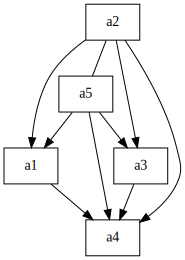

In [5]:
plot_relation(relations_p1)

## Promethee 2 preferences

In [6]:
res_p2 = promethee2(dataset, preference_func_list, scales, P, Q, S, W)
res_p2

a1   -1.024390
a2    1.908537
a3   -0.701220
a4   -2.091463
a5    1.908537
dtype: float64

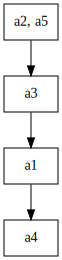

In [7]:
plot_linear_ranking(res_p2)

## Promethee GAIA plane

<IPython.core.display.Javascript object>


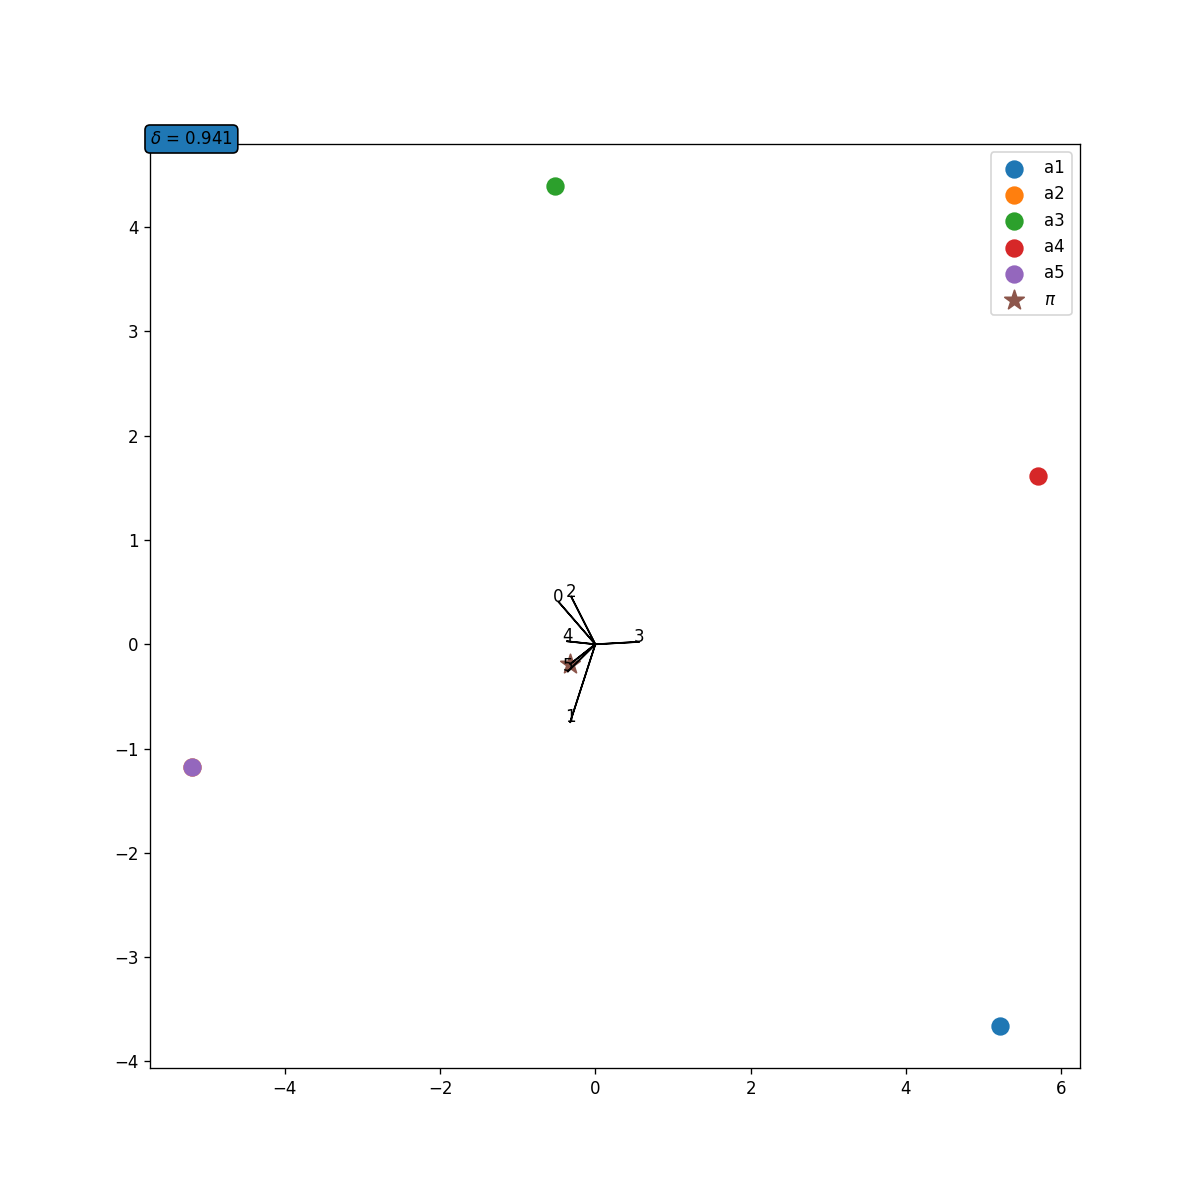

In [8]:
gaia(dataset, preference_func_list, P, Q, S, W)